# TASK 1

In [25]:
import pandas as pd
import numpy as np
Episode_4 = pd.read_csv("/content/SW_EpisodeIV.txt",delimiter=' ',on_bad_lines='skip')
Episode_5 = pd.read_csv("/content/SW_EpisodeV.txt",delimiter=' ',on_bad_lines='skip')
Episode_6 = pd.read_csv("/content/SW_EpisodeVI.txt",delimiter=' ',on_bad_lines='skip')


In [ ]:
Episode_4.head(10)


In [27]:
type(Episode_4)

pandas.core.frame.DataFrame

In [ ]:
Episode_5.head(10)


In [ ]:
Episode_6.head(10)


In [44]:
for i, episode_df in enumerate([Episode_4, Episode_5, Episode_6], start=4):
    # Group the data by character, and count the number of dialogues for each character
    dialogue_counts = episode_df.groupby("character")["dialogue"].count()

    # Find the character with the most dialogues
    max_count = dialogue_counts.max()
    max_character = dialogue_counts[dialogue_counts == max_count].index[0]
    print(f"In Episode {i}, {max_character} has the most dialogues with {max_count} lines.")


In Episode 4, LUKE has the most dialogues with 254 lines.
In Episode 5, HAN has the most dialogues with 181 lines.
In Episode 6, HAN has the most dialogues with 124 lines.


# TASK 2

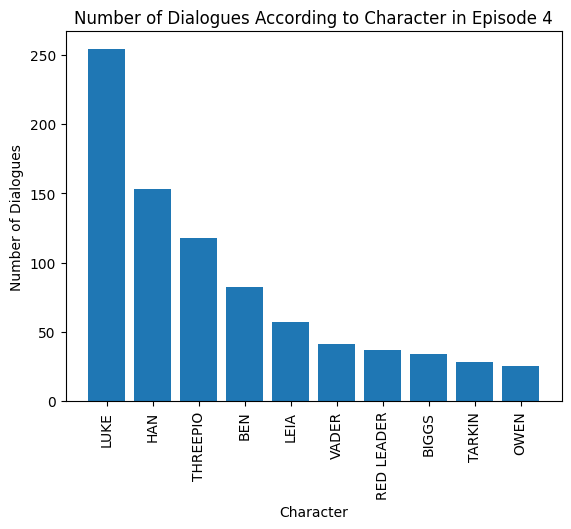

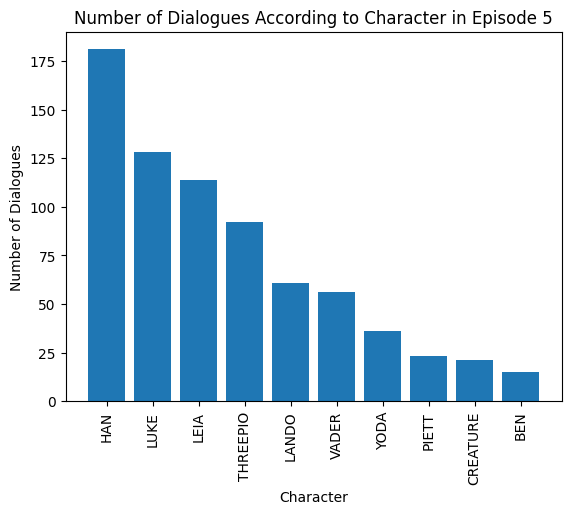

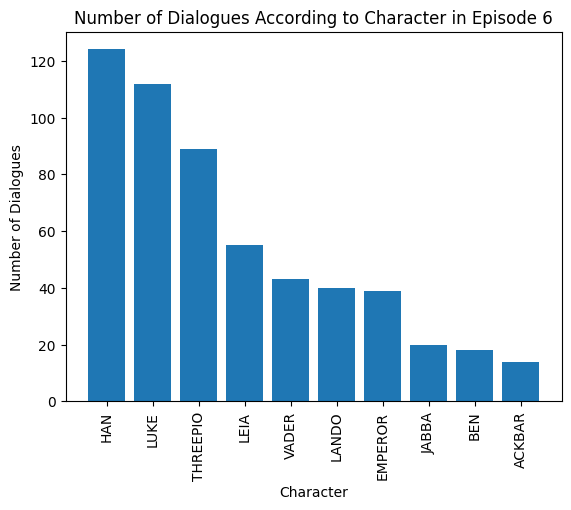

In [54]:
# Loop over the episodes and plot the number of dialogues according to character for each episode
for i, episode_df in enumerate([Episode_4, Episode_5, Episode_6], start=4):
    # Group the data by character, and count the number of dialogues for each character
    dialogue_counts = episode_df.groupby("character")["dialogue"].count()

    # Sort the characters by their dialogue counts in descending order
    sorted_counts = dialogue_counts.sort_values(ascending=False)

    # Plot the top 10 characters with the most dialogues
    plt.bar(sorted_counts.index[:10], sorted_counts[:10])
    plt.xticks(rotation=90)
    plt.xlabel("Character")
    plt.ylabel("Number of Dialogues")
    plt.title(f"Number of Dialogues According to Character in Episode {i}")
    plt.show()


# TASK 3

In [58]:
# Add a new column "episode" to each dataset
Episode_4 = Episode_4.assign(episode=4)
Episode_5 = Episode_5.assign(episode=5)
Episode_6 = Episode_6.assign(episode=6)
Episode_4

,character,dialogue,episode
1,THREEPIO,Did you hear that? They've shut down the main...,4
2,THREEPIO,We're doomed!,4
3,THREEPIO,There'll be no escape for the Princess this time.,4
4,THREEPIO,What's that?,4
5,THREEPIO,I should have known better than to trust the l...,4
...,...,...,...
1006,LUKE,"Oh, no!",4
1007,THREEPIO,"Oh, my! Artoo! Can you hear me? Say somethi...",4
1008,TECHNICIAN,We'll get to work on him right away.,4
1009,THREEPIO,"You must repair him! Sir, if any of my circui...",4


In [59]:
Episodes = pd.concat([Episode_4, Episode_5, Episode_6])
Episodes

,character,dialogue,episode
1,THREEPIO,Did you hear that? They've shut down the main...,4
2,THREEPIO,We're doomed!,4
3,THREEPIO,There'll be no escape for the Princess this time.,4
4,THREEPIO,What's that?,4
5,THREEPIO,I should have known better than to trust the l...,4
...,...,...,...
670,LANDO,"Wedge, I don't think we're going to make it.",6
671,WEDGE,You'll make it. Just follow me Gold Leader.,6
672,LANDO,I promised to return his ship without a scratc...,6
673,HAN,Lando...,6


# TASK 4

In [60]:
Episodes

,character,dialogue,episode
1,THREEPIO,Did you hear that? They've shut down the main...,4
2,THREEPIO,We're doomed!,4
3,THREEPIO,There'll be no escape for the Princess this time.,4
4,THREEPIO,What's that?,4
5,THREEPIO,I should have known better than to trust the l...,4
...,...,...,...
670,LANDO,"Wedge, I don't think we're going to make it.",6
671,WEDGE,You'll make it. Just follow me Gold Leader.,6
672,LANDO,I promised to return his ship without a scratc...,6
673,HAN,Lando...,6


In [62]:
# Concatenate all the dialogues into a single corpus
corpus = " ".join(Episodes["dialogue"].tolist())
corpus

"Did you hear that?  They've shut down the main reactor.  We'll be destroyed for sure.  This is madness! We're doomed! There'll be no escape for the Princess this time. What's that? I should have known better than to trust the logic of a half-sized thermocapsulary dehousing assister... Hurry up!  Come with me!  What are you waiting for?!  Get in gear! Artoo! Artoo-Detoo, where are you? At last!  Where have you been? They're heading in this direction. What are we going to do?  We'll be sent to the spice mines of Kessel or smashed into who knows what! Wait a minute, where are you going? The Death Star plans are not in the main computer. Where are those transmissions you intercepted? We intercepted no transmissions. Aaah...  This is a consular ship. Were on a diplomatic mission. If this is a consular ship... where is the Ambassador? Commander, tear this ship apart until you've found those plans and bring me the Ambassador.  I want her alive! There she is! Set for stun! She'll be all right

In [91]:
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Remove punctuation and convert to lowercase
corpus = corpus.translate(str.maketrans('', '', string.punctuation)).lower()
corpus


'did you hear that  theyve shut down the main reactor  well be destroyed for sure  this is madness were doomed therell be no escape for the princess this time whats that i should have known better than to trust the logic of a halfsized thermocapsulary dehousing assister hurry up  come with me  what are you waiting for  get in gear artoo artoodetoo where are you at last  where have you been theyre heading in this direction what are we going to do  well be sent to the spice mines of kessel or smashed into who knows what wait a minute where are you going the death star plans are not in the main computer where are those transmissions you intercepted we intercepted no transmissions aaah  this is a consular ship were on a diplomatic mission if this is a consular ship where is the ambassador commander tear this ship apart until youve found those plans and bring me the ambassador  i want her alive there she is set for stun shell be all right inform lord vader we have a prisoner hey youre not p

In [99]:

# Tokenize the text into individual words
words = word_tokenize(corpus)

# Create a frequency distribution of the words
freq_dist = nltk.FreqDist(words)
freq_dist


FreqDist({'the': 910, 'you': 895, 'i': 672, 'to': 644, 'a': 436, 'of': 351, 'it': 326, 'your': 288, 'is': 272, 'be': 246, ...})

# TASK 5

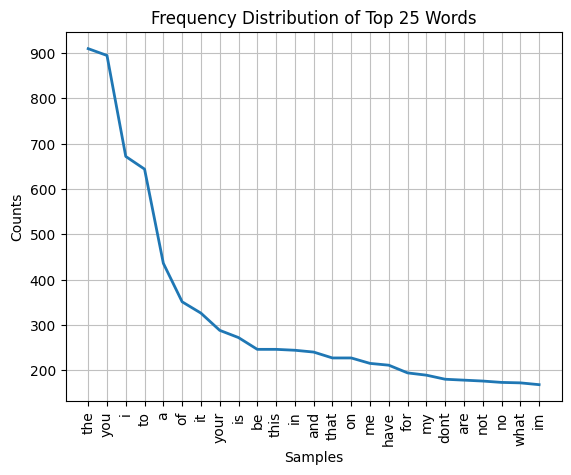

<Axes: title={'center': 'Frequency Distribution of Top 25 Words'}, xlabel='Samples', ylabel='Counts'>

In [100]:
# Plot the frequency distribution of the top 50 words
freq_dist.plot(25, title="Frequency Distribution of Top 25 Words")

# TASK 6 a&b

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [148]:

# Define the text-mining operations to perform
def text_mining_operations(text):
    # Convert the text to lower case
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text into words
    words = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatize the words using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Return the processed words as a space-separated string
    return " ".join(words)

# Apply the text-mining operations to the "dialogue" column and store the results in a new column called "new_script"
Episodes['new_script'] = Episodes['dialogue'].apply(text_mining_operations)


In [127]:
type(text)

str

In [116]:
Episodes


,character,dialogue,episode,new_script
1,THREEPIO,Did you hear that? They've shut down the main...,4,hear theyve shut main reactor well destroyed s...
2,THREEPIO,We're doomed!,4,doomed
3,THREEPIO,There'll be no escape for the Princess this time.,4,therell escape princess time
4,THREEPIO,What's that?,4,whats
5,THREEPIO,I should have known better than to trust the l...,4,known better trust logic halfsized thermocapsu...
...,...,...,...,...
670,LANDO,"Wedge, I don't think we're going to make it.",6,wedge dont think going make
671,WEDGE,You'll make it. Just follow me Gold Leader.,6,youll make follow gold leader
672,LANDO,I promised to return his ship without a scratc...,6,promised return ship without scratchi sure hop...
673,HAN,Lando...,6,lando


# TASK 7



In [155]:
Episodes


,character,dialogue,episode,new_script
1,THREEPIO,Did you hear that? They've shut down the main...,4,hear theyve shut main reactor well destroyed s...
2,THREEPIO,We're doomed!,4,doomed
3,THREEPIO,There'll be no escape for the Princess this time.,4,therell escape princess time
4,THREEPIO,What's that?,4,whats
5,THREEPIO,I should have known better than to trust the l...,4,known better trust logic halfsized thermocapsu...
...,...,...,...,...
670,LANDO,"Wedge, I don't think we're going to make it.",6,wedge dont think going make
671,WEDGE,You'll make it. Just follow me Gold Leader.,6,youll make follow gold leader
672,LANDO,I promised to return his ship without a scratc...,6,promised return ship without scratchi sure hop...
673,HAN,Lando...,6,lando


In [156]:
# Concatenate all the dialogues into a single corpus
corpus = " ".join(Episodes["new_script"].tolist())
corpus

'hear theyve shut main reactor well destroyed sure madness doomed therell escape princess time whats known better trust logic halfsized thermocapsulary dehousing assister hurry come waiting get gear artoo artoodetoo last theyre heading direction going well sent spice mine kessel smashed know wait minute going death star plan main computer transmission intercepted intercepted transmission aaah consular ship diplomatic mission consular ship ambassador commander tear ship apart youve found plan bring ambassador want alive set stun shell right inform lord vader prisoner hey youre permitted restricted youll deactivated sure dont call mindless philosopher overweight glob grease come somebody see secret mission plan talking im getting im going regret go another one hold fire life form must shortcircuited thats funny damage doesnt look bad sure thing safe ive told kid slow hear young noise blast wormie another rampage shape guy biggs didnt know back get wanted surprise hot shot thought youd ce

In [157]:
# Remove punctuation and convert to lowercase
corpus = corpus.translate(str.maketrans('', '', string.punctuation)).lower()
corpus

'hear theyve shut main reactor well destroyed sure madness doomed therell escape princess time whats known better trust logic halfsized thermocapsulary dehousing assister hurry come waiting get gear artoo artoodetoo last theyre heading direction going well sent spice mine kessel smashed know wait minute going death star plan main computer transmission intercepted intercepted transmission aaah consular ship diplomatic mission consular ship ambassador commander tear ship apart youve found plan bring ambassador want alive set stun shell right inform lord vader prisoner hey youre permitted restricted youll deactivated sure dont call mindless philosopher overweight glob grease come somebody see secret mission plan talking im getting im going regret go another one hold fire life form must shortcircuited thats funny damage doesnt look bad sure thing safe ive told kid slow hear young noise blast wormie another rampage shape guy biggs didnt know back get wanted surprise hot shot thought youd ce

In [158]:
# Tokenize the text into individual words
words = word_tokenize(corpus)

# Create a frequency distribution of the words
freq_dist = nltk.FreqDist(words)
print(type(freq_dist))
freq_dist

<class 'nltk.probability.FreqDist'>


FreqDist({'dont': 180, 'im': 168, 'get': 129, 'luke': 129, 'well': 121, 'going': 121, 'right': 113, 'come': 111, 'know': 109, 'oh': 109, ...})

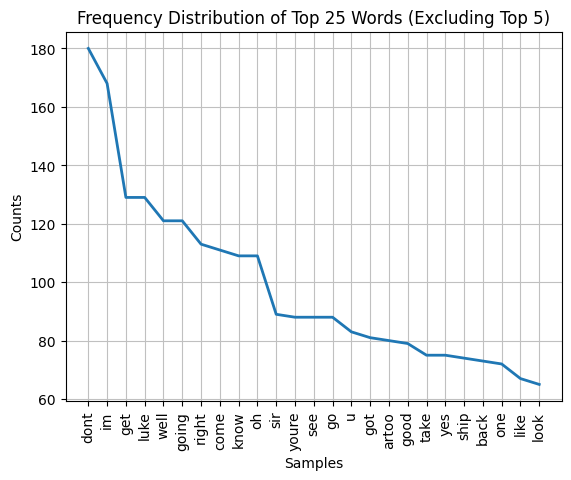

<Axes: title={'center': 'Frequency Distribution of Top 25 Words (Excluding Top 5)'}, xlabel='Samples', ylabel='Counts'>

In [159]:

# Plot the frequency distribution of the top 25 words
freq_dist.plot(25, title="Frequency Distribution of Top 25 Words (Excluding Top 5)")


# TASK 8

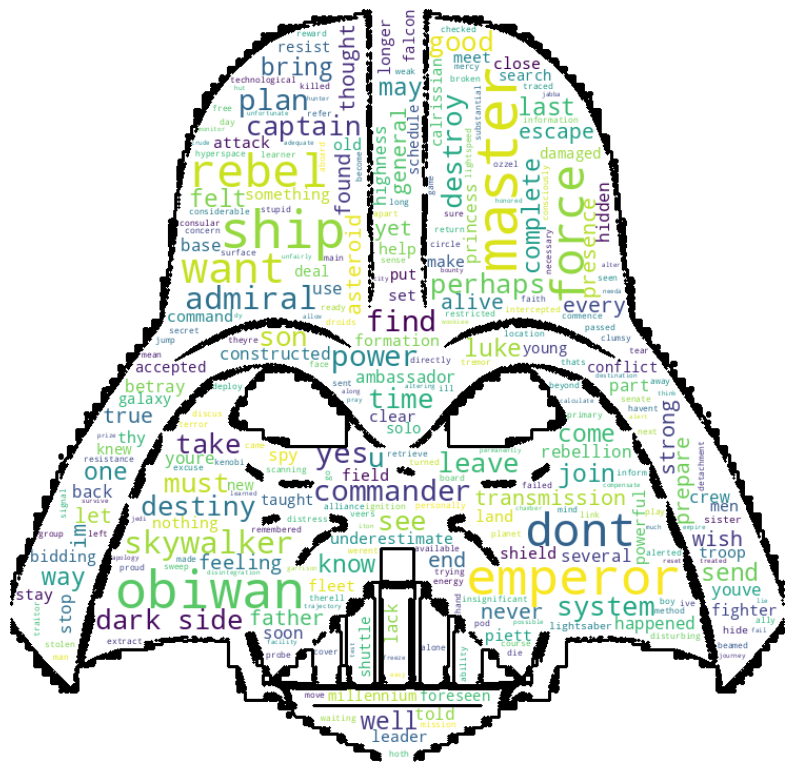

In [167]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Generate text for Darth Vader
vader_text = " ".join(Episodes[Episodes['character']=='VADER']['new_script'].tolist())

# Load mask image
mask = np.array(Image.open("vader.jpg"))

# Create a WordCloud object and set its properties
wc = WordCloud(background_color="white", max_words=300, mask=mask,
               contour_width=3, contour_color='black', stopwords=STOPWORDS)
               
# Generate the word cloud
wc.generate(vader_text)

# Plot the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


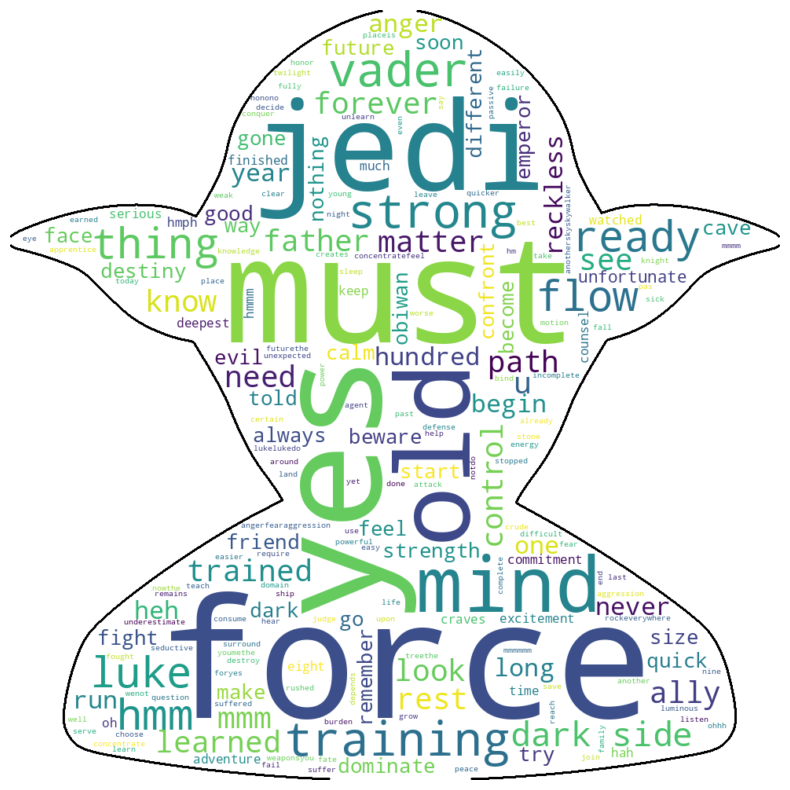

In [171]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Generate text for Darth Vader
yoda_text = " ".join(Episodes[Episodes['character']=='YODA']['new_script'].tolist())

# Load mask image
mask = np.array(Image.open("yoda.png"))

# Create a WordCloud object and set its properties
wc = WordCloud(background_color="white", max_words=400, mask=mask,
               contour_width=3, contour_color='black', stopwords=STOPWORDS)
               
# Generate the word cloud
wc.generate(yoda_text)

# Plot the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


# TASK 9


In [204]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Concatenate all dialogue texts into a single string
corpus = " ".join(str(i) for i in Episodes.new_script.values)

# Preprocess the text data
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

corpus = preprocess_text(corpus)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(use_idf=True, stop_words='english')

# Fit the vectorizer on the corpus and transform the corpus into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform([corpus])

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Calculate the TF-IDF scores for the corpus
tfidf_scores = tfidf_matrix.toarray()[0]

# Create a DataFrame to store the words and their importance scores
df_tfidf = pd.DataFrame({'Word': feature_names, 'Importance Score': tfidf_scores})

# Sort the DataFrame by importance score in descending order
df_tfidf = df_tfidf.sort_values('Importance Score', ascending=False)

# Print the top 20 most relevant words and their scores
top_words = df_tfidf.head(20)
print("Top 20 most relevant words:")
print(top_words)


Top 20 most relevant words:
        Word  Importance Score
659     dont          0.306305
1108      im          0.285884
1308    luke          0.219518
943    going          0.205905
1820   right          0.192291
417     come          0.188888
1488      oh          0.185484
1214    know          0.185484
1971     sir          0.151451
2503   youre          0.149749
954      got          0.137837
130    artoo          0.136135
948     good          0.134434
2494     yes          0.127627
1940    ship          0.125925
1266    like          0.114013
1288    look          0.110610
371   chewie          0.108908
2221   think          0.107207
2247    time          0.103803


# TASK 10

In [205]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Instantiate the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the sentiment scores for a given text
def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(text)
    return scores

# Example usage
scores = Episodes['dialogue'].apply(get_sentiment_scores)
 

print(scores)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


1      {'neg': 0.27, 'neu': 0.633, 'pos': 0.097, 'com...
2      {'neg': 0.818, 'neu': 0.182, 'pos': 0.0, 'comp...
3      {'neg': 0.202, 'neu': 0.642, 'pos': 0.156, 'co...
4      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5      {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...
                             ...                        
670    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
671    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
672    {'neg': 0.223, 'neu': 0.511, 'pos': 0.266, 'co...
673    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
674    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: dialogue, Length: 2519, dtype: object


In [206]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Instantiate the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the sentiment scores for a given text
def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(text)
    return scores

# Apply the function to the dialogue column of the Episodes dataframe
scores = Episodes['dialogue'].apply(get_sentiment_scores)

# Add the sentiment scores to the Episodes dataframe as separate columns
Episodes[['neg_score', 'neu_score', 'pos_score', 'compound_score']] = pd.DataFrame(scores.tolist(), index=scores.index)

# Print the first 10 rows of the Episodes dataframe with the sentiment scores added
print(Episodes.head(10))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   character                                           dialogue  episode  \
1   THREEPIO  Did you hear that?  They've shut down the main...        4   
2   THREEPIO                                      We're doomed!        4   
3   THREEPIO  There'll be no escape for the Princess this time.        4   
4   THREEPIO                                       What's that?        4   
5   THREEPIO  I should have known better than to trust the l...        4   
6       LUKE  Hurry up!  Come with me!  What are you waiting...        4   
7   THREEPIO                 Artoo! Artoo-Detoo, where are you?        4   
8   THREEPIO                     At last!  Where have you been?        4   
9   THREEPIO  They're heading in this direction. What are we...        4   
10  THREEPIO                Wait a minute, where are you going?        4   

                                           new_script  neg_score  neu_score  \
1   hear theyve shut main reactor well destroyed s...      0.270      0.633   
2    

In [207]:
# Episode 4
ep4_scores = Episodes[Episodes['episode'] == 4][['neg_score', 'neu_score', 'pos_score', 'compound_score']].mean()
print("Sentiment scores for Episode 4:")
print(ep4_scores)

# Episode 5
ep5_scores = Episodes[Episodes['episode'] == 5][['neg_score', 'neu_score', 'pos_score', 'compound_score']].mean()
print("Sentiment scores for Episode 5:")
print(ep5_scores)

# Episode 6
ep6_scores = Episodes[Episodes['episode'] == 6][['neg_score', 'neu_score', 'pos_score', 'compound_score']].mean()
print("Sentiment scores for Episode 6:")
print(ep6_scores)


Sentiment scores for Episode 4:
neg_score         0.085021
neu_score         0.820175
pos_score         0.094794
compound_score    0.004970
dtype: float64
Sentiment scores for Episode 5:
neg_score         0.083298
neu_score         0.772295
pos_score         0.144409
compound_score    0.067095
dtype: float64
Sentiment scores for Episode 6:
neg_score         0.083307
neu_score         0.788723
pos_score         0.127976
compound_score    0.051601
dtype: float64


In [210]:
# YODA
YODA_scores = Episodes[Episodes['character'] == "YODA"][['neg_score', 'neu_score', 'pos_score', 'compound_score']].mean()
print("Sentiment scores for YODA:")
print(YODA_scores)

# LUKE
LUKE_scores = Episodes[Episodes['character'] == "LUKE"][['neg_score', 'neu_score', 'pos_score', 'compound_score']].mean()
print("Sentiment scores for LUKE:")
print(LUKE_scores)

# VADER
VADER_scores = Episodes[Episodes['character'] == "VADER"][['neg_score', 'neu_score', 'pos_score', 'compound_score']].mean()
print("Sentiment scores for VADER:")
print(VADER_scores)

# EMPEROR
EMPEROR_scores = Episodes[Episodes['character'] == "EMPEROR"][['neg_score', 'neu_score', 'pos_score', 'compound_score']].mean()
print("Sentiment scores for EMPEROR:")
print(EMPEROR_scores)


Sentiment scores for YODA:
neg_score         0.114163
neu_score         0.779796
pos_score         0.106020
compound_score   -0.014833
dtype: float64
Sentiment scores for LUKE:
neg_score         0.077992
neu_score         0.806638
pos_score         0.115368
compound_score    0.038590
dtype: float64
Sentiment scores for VADER:
neg_score         0.086086
neu_score         0.778357
pos_score         0.135564
compound_score    0.029026
dtype: float64
Sentiment scores for EMPEROR:
neg_score         0.123977
neu_score         0.685636
pos_score         0.190386
compound_score    0.102123
dtype: float64
